# Sistema de Equações Lineares

## Algoritmo do Método da Decomposição LU

**Fase de Decomposição** O método da Decomposição LU (Doolittle's) possui as seguintes propriedades:

* A matriz $U$ é identica à matriz triangular superior resultante da Eliminação de Gauss;
* Os elementos da parte inferior abaixo da diagonal principal da matriz $L$ são os multiplicadores utilizados durante a Eliminação de Gauss, ou seja, $L_{ij}$ é o multiplicador que eliminou $A_{ij}$.

É prática usual armazenar os multiplicadores na porção inferior da matriz de coeficientes, substituindo os coeficientes a medida que eles são eliminados ($L_{ij}$ substituindo $A_{ij}$). Os elementos da diagonal de $L$ não precisam ser armazenados, pois entende-se que seus valores são unitários. A forma final da matriz de coeficientes seria a mistura de $L$ e $U$:

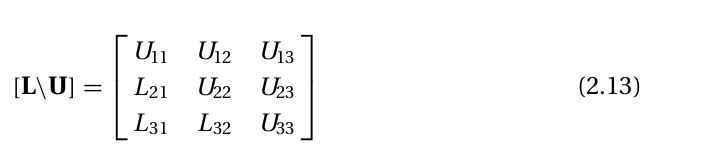

A parte inicial do algoritmo do Método da Decomposição LU é identida à Eliminação de Gauss, exceto que cada multiplicador $\lambda$ é agora armazenado na porção triangular inferior da matriz $A$: 

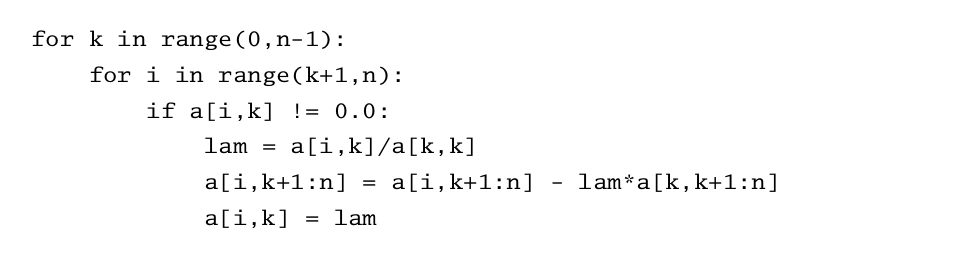

**Fase da Resolução** Considere agora o procedimento para a solução de $Ly = b$ pelas substituições sucessivas (slide 13). Lembre-se que $L_{ii} = 1$:  

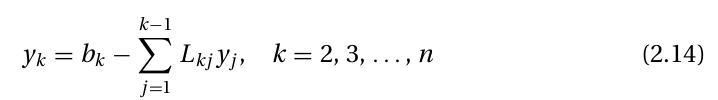

Consequentemente, o algoritmo das substituições sucessivas é:

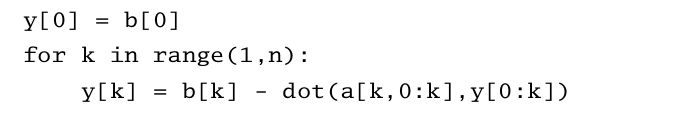

A fase das substituições retroativas para resolver $Ux = y$ é idêntica a que é usada pelo método da Eliminação de Gauss. 

O algoritmo a seguir contém ambas as fases de decomposição e resolução. A fase de decomposição retorna a matriz $[LU]$ mostrada na Figura 2.13. Na fase de resolução, os conteúdos de $b$ são sobrescritos por $y$ durante as substituições sucessivas. Similarmente, as substituições retroativas sobrescrevem o conteúdo de $y$ pela solução $x$.

**Execução do Programa**

In [ ]:
import numpy as np

In [ ]:
def LUdecomp(a):
    n = len(a)
    for k in range(0,n-1):
        for i in range(k+1,n):
           if a[i,k] != 0.0:
               lam = a [i,k]/a[k,k]
               a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
               a[i,k] = lam
    return a

def LUsolve(a,b):
    n = len(a)
    for k in range(1,n):
        b[k] = b[k] - np.dot(a[k,0:k],b[0:k])
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
       b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b


In [ ]:
z = np.array([[3.0, -1.0, 4.0],
             [-2.0, 0.0, 5.0],
             [7.0, 2.0, -2.0]])

k = np.array([[6.0, 3.0, 7.0]])

In [ ]:
z = LUdecomp(z)
x = LUsolve(z,k[0])

In [ ]:
print('x = \n', x)